<a href="https://colab.research.google.com/github/Ananassio/Data-Minig-Lab/blob/main/Week_4/Assignment_face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Face recognition with non-linear eigenfaces 

### Data: ["Labeled Face in the Wild"](http://vis-www.cs.umass.edu/lfw/index.html)

In [1]:
# basic imports
from time import time #to compute runtimes
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import pandas as pd

### Get Data


In [2]:
from sklearn.datasets import fetch_lfw_people #data is part of Scikit Learn

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4) #get data - take some time

In [3]:
# get data shapes
n_samples, h, w = lfw_people.images.shape
print(n_samples, h, w)

1288 50 37


In [4]:
# get data and labels
X = lfw_people.data #data
y = lfw_people.target #labels

In [5]:
n_features = X.shape[1] #get size of images
print("number of pixels per image:", n_features)

target_names = lfw_people.target_names #get unique IDs of people
n_classes = target_names.shape[0]

print("names of people", target_names)
print("number of people in DB:", n_classes)

number of pixels per image: 1850
names of people ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
number of people in DB: 7


Text(0.5, 1.0, 'George W Bush')

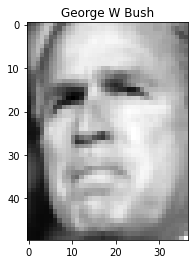

In [6]:
#vis example
plt.gray()
plt.imshow(X[12,:].reshape(h,w))
plt.title(target_names[y[12]])

## ML Model

### Task 1: Split in test and train set
* 20% test - 80% train -> use SKL split function!

In [7]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

### Task 1: Apply Kernel-PCA to train data
* Plot Eigenvalues (explained variance) and find cut-off 
* Project all data (train+test) to Eigen-Face-Space

HINT: use *whitenig* in the PCA -> normalization of the components

-> see [https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html)

In [36]:
from sklearn.decomposition import KernelPCA 

In [49]:
pca = PCA(whiten=True)
pca.fit(X_train)

PCA(whiten=True)

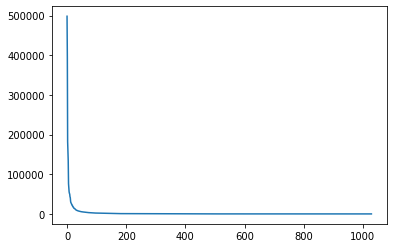

In [50]:
#plot Eigen-Values
plt.plot(pca.explained_variance_)

Cut-off bei 150


In [67]:
#fit the model angain and cut-off at 100
pca = PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(n_components=150, whiten=True)

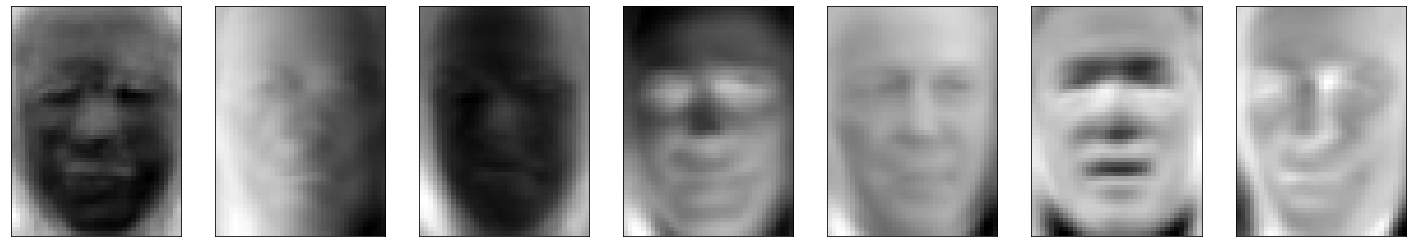

In [68]:
#have look at the first 7 Eigen-Vectors
fig, ax = plt.subplots(1, 7, figsize=(25,16))
for i in range(7):
    ax[i].imshow(pca.components_[i].reshape(h,w))
    ax[i].set_yticks([])
    ax[i].set_xticks([])

In [70]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(1030, 150)
(258, 150)


### Task 2: Visualize Faces in kernel-PCA space with Tensorflow projector 
* upload data (original data and in kPCA space) and lables
* use images or different colors for different people


In [16]:
from sklearn.decomposition import KernelPCA
#kpca=KernelPCA(kernel='linear')
kpca=KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=2 )
#kpca=KernelPCA(kernel="poly", fit_inverse_transform=True, degree= )

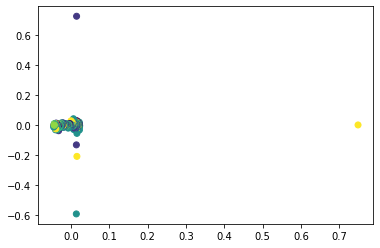

In [19]:
X_new = kpca.fit_transform(X) #apply base chage to data

plt.scatter(X_new[:,0],X_new[:,1], c=y, cmap='viridis')

In [31]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=32)
kernel_pca = KernelPCA(
    n_components=100, kernel="rbf", gamma=1e-3, fit_inverse_transform=True, alpha=5e-3
)

pca.fit(X_train)
_ = kernel_pca.fit(X_train)

In [71]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

%load_ext tensorboard

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [72]:
import os
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorboard.plugins import projector